In [ ]:
from IPython.display import display, HTML
from datetime import datetime

# Define the notebook title
Notebook_title = "House_Prices_Models"

# Get the current date
current_date = datetime.now().strftime("%B %d, %Y")

# Create the HTML string with title, date, and author
html_content = f"""
<h1 style="text-align:center;">{Notebook_title}</h1>
<br/>
<h3 style="text-align:left;">MikiasHWT</h3>
<h3 style="text-align:left;">{current_date}</h3>
"""

# Display the HTML content in the output
display(HTML(html_content))


# Prep Workplace

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from setuptools import distutils

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# To show multiple lines in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Directories

In [144]:
# Directories = {
#     "datDir": "path/",
#     "outDir": "path/"
# }

# # Data Directory
# datDir = ""

# # View data
# os.listdir(datDir)

# # Output Directory
# outDir = ""

# # View outputs
# os.listdir(outDir)

# # Define required directories
# Directories = {
#     "datDir": "path/to/data",
#     "outDir": "path/to/output"
# }

# # Create directories (if they don't exist) & list contents
# for folder, path in Directories.items():
#     os.makedirs(path, exist_ok=True) 
#     print(f"Contents of {path}:")
#     print("\n".join(os.listdir(path))) 

# Background

## Motivation

## Data Source

In [2]:
DatDescriptionPath = 'data/data_description.txt'

# DatDescription = pd.read_csv('data/data_description.txt', delimiter=' ')


# Open and read the text file
with open(DatDescriptionPath, 'r') as file:
    content = file.read()

# Display the content
print(content)



MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Import Data

In [3]:
# Define filepaths
iowa_file_path = 'data/train.csv'
test_data_path = 'data/test.csv'

# Read data files
HomeDat = pd.read_csv(iowa_file_path, index_col="Id")
TestDat = pd.read_csv(test_data_path, index_col="Id")


In [ ]:
# Variable types
variable_types = HomeDat.dtypes

# Summary
variable_types.value_counts()

In [ ]:
# Summary statistics: numerical variables
summary_stats = HomeDat.describe()

summary_stats

In [ ]:
# Summary statistics: categorical variables
categorical_summary = HomeDat.describe(include='object')

categorical_summary


# Categorize Features
- Numerical Variables: Continuous and discrete numbers.
- Categorical Variables: Variables with distinct categories.
- Date/Time Variables: Variables representing dates or times (if applicable).
- Target Variable: The variable you are trying to predict.

In [ ]:
# Separate numerical and categorical columns
numerical_columns = HomeDat.select_dtypes(include=['number']).columns
categorical_columns = HomeDat.select_dtypes(include=['object', 'category']).columns

print(f"Numerical columns: {numerical_columns} \n {len(numerical_columns)} columns total")
print(f"\nCategorical columns: {categorical_columns} \n {len(categorical_columns)} columns total")

In [ ]:
# Separate predictor and outcome variables (using only numerical predictors for now)
X = HomeDat[numerical_columns.drop("SalePrice")]    
X.shape

y = HomeDat["SalePrice"]
y.shape

# Prep train and test data
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  train_size=0.8, 
                                                  random_state=42)

# Handle Missing Values
- Impute 
- Remove
- 

In [ ]:
# Check for missing values
missing_values_all = HomeDat.isnull().sum().sort_values(ascending=False)
print(f"Number of missing values for all columns: \n{missing_values_all[missing_values_all> 0]}")

missing_numeric_values = X.isnull().sum().sort_values(ascending=False)
print(f"\nNumber of missing values for numeric columns: \n{missing_numeric_values[missing_numeric_values> 0]}")

In [ ]:
# Number of columns missing values
print(f"There are {(missing_numeric_values > 0).sum()} numerical variables containing NA's.")
print(f"For a total of {missing_numeric_values.sum()} missing numeric values.")


# Context
print(f"\nThe whole dataset has {(missing_values_all > 0).sum()} variables containing NA's. \nFor a sum total of {missing_values_all.sum()} missing values")
print(f"\nThe whole dataset contains {HomeDat.shape[0]} observations and {HomeDat.shape[1]} variables.")

In [154]:
# Function to compare various Random Forest models
def score_dataset(X_train, X_val, y_train, y_val):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

## Drop columns

In [ ]:
# Names of columns with missing values
cols_with_nulls = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns missing values
reduced_X_train = X_train.drop(columns = cols_with_nulls, axis=1)
reduced_X_valid = X_val.drop(columns = cols_with_nulls, axis=1)

print(f"For one approach, we eliminate columns with NA values, reducing our datasets from {X_train.shape[1]} to {reduced_X_train.shape[1]} variables.")


In [ ]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_val))

## Impute values

In [ ]:
# Create instance of imputer class
my_imputer = SimpleImputer()

# Impute missing values in train data with mean value of the column (mean = default)
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))

# Use train data mean to impute missing values in validation dataset (transform without fit for consistency)
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_val))

# Numpy array is returned without column names, return the names
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_val.columns

print("MAE from Approach 2 (SimpleImputer):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_val))

Results are worse for imputing values that dropping columns. 
This result can be expected depending on the nature of the dataset, the variables we imputed as well as how we chose to impute their values. 

eg: Missing values in GarageYrBlt (Year garage was built) variable could indicated the house doesn't have a garage. So imputing a mean could produce more noise in the dataset. In this case, an alternate approach may be warranted. 

### Garage Variables
- GarageYrBlt (Year garage was built)
- GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
- GarageYrBlt: Year garage was built
		
- GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
# Extract garage related variables from full dataset
garage_columns = HomeDat.filter(like="Garage")[HomeDat['GarageYrBlt'].isnull()]

# Explore 
garage_columns.shape

print(f"These Garage related variables have the following number of NA values: \n{garage_columns.isnull().sum()}")



In [ ]:
# Consider value of GarageYrBlt columns
# HomeDat[["GarageYrBlt", "GarageArea", "YearBuilt", "YearRemodAdd"]]

HomeDat[["GarageYrBlt", "YearBuilt", "YearRemodAdd"]].describe()

# Correlation of potentially related variables
HomeDat[["GarageArea", "GarageYrBlt", "YearBuilt", "YearRemodAdd"]].corr()



In [ ]:
# Remove NaN values from the data
filtered_data = HomeDat[['GarageYrBlt', 'YearBuilt']]

# Scatter plot with best-fit line
sns.lmplot(x='GarageYrBlt', y='YearBuilt', data=filtered_data, line_kws={'color': 'magenta'})

# Show the plot
plt.show()


In [ ]:
features_subset = HomeDat[["GarageYrBlt", "GarageArea", "YearBuilt", "YearRemodAdd"]]
target = HomeDat["SalePrice"]  # Replace 'SalePrice' with your target column

model = DecisionTreeRegressor()
model.fit(features_subset, target)

# Feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({
    'Feature': ["GarageYrBlt", "GarageArea", "YearBuilt", "YearRemodAdd"],
    'Importance': feature_importance
})

importance_df.sort_values(by="Importance", ascending=False)

#### Decision: Drop GarageYrBlt Variable. 
- Comparing garage related variables, it seems null values in GarageYrBlt indicate homes without garages. This is evident by the area's given as 0 and by NA values for other columns.
- GarageYrBlt and YearBuilt are highly correlated (82%)
- Quick inspection of the importance of GarageYrBlt (relative to the 3 other) variable shows minimal significance of the variable to the Random Forest model created. (same with YearRemodAdd) 

### LotFrontage Variables (-ish)
- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet
	
- LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
	
- LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [ ]:
# Extract lot related variables from full dataset
lot_columns = HomeDat.filter(like="Lot")[HomeDat['LotFrontage'].isnull()]

lot_columns


In [ ]:
# LotFrontage by LotConfig 
lotconfig_summary = HomeDat.groupby('LotConfig')['LotFrontage'].agg(
    Total_Instances='size',
    NA_Count=lambda x: x.isnull().sum(),
    Average_LotFrontage='mean'
)

# LotFrontage by LotShape
lotshape_summary = HomeDat.groupby('LotShape')['LotFrontage'].agg(
    Total_Instances='size',
    NA_Count=lambda x: x.isnull().sum(),
    Average_LotFrontage='mean'
)

# Display summaries
print("LotFrontage missing values and averages by LotConfig:")
print(lotconfig_summary)

print("\nLotFrontage missing values and averages by LotShape:")
print(lotshape_summary)

In [ ]:
HomeDat[['LotFrontage', 'LotArea']].corr()

In [ ]:
# Create a figure and adjust its size
plt.figure(figsize=(14, 6))

# Plot 1: Scatter plot with best-fit lines colored by LotShape
sns.lmplot(x='LotArea', y='LotFrontage', hue='LotShape', data=HomeDat, scatter_kws={'s': 10}, line_kws={'linewidth': 2}, ci=None)
plt.title('LotArea vs LotFrontage by LotShape')

# Plot 2: Scatter plot with best-fit lines colored by LotConfig
sns.lmplot(x='LotArea', y='LotFrontage', hue='LotConfig', data=HomeDat, scatter_kws={'s': 10}, line_kws={'linewidth': 2}, ci=None)
plt.title('LotArea vs LotFrontage by LotConfig')

# Adjust layout of plots (shown in Jupyter Notebook)
plt.tight_layout()
plt.show()

In [ ]:
features_subset2 = HomeDat[['LotFrontage', 'LotArea']]
target = HomeDat["SalePrice"]  # Replace 'SalePrice' with your target column

model = DecisionTreeRegressor()
model.fit(features_subset2, target)

# Feature importance
feature_importance2 = model.feature_importances_

# Create a DataFrame to view feature importance
importance_df2 = pd.DataFrame({
    'Feature': ['LotFrontage', 'LotArea'],
    'Importance': feature_importance2
})

importance_df2.sort_values(by="Importance", ascending=False)

In [ ]:
features_subset3 = HomeDat[numerical_columns.drop("SalePrice")] 
target = HomeDat["SalePrice"]  # Replace 'SalePrice' with your target column

model = DecisionTreeRegressor()
model.fit(features_subset3, target)

# Feature importance
feature_importance3 = model.feature_importances_

# Create a DataFrame to view feature importance
importance_df3 = pd.DataFrame({
    'Feature': numerical_columns.drop("SalePrice"),
    'Importance': feature_importance3
})

importance_df3.sort_values(by="Importance", ascending=False)

#### Decision: Impute LotFrontage with median values
- I see no obvious patters to lead me to impute a category specific value for LotFrontage
- I see no strong patterns between lot variables and missing LotFrontage values
- I am not convinced that LotFrontage is insignificant enough to discard
- I believe imputing with a median value will cause the least induction of noise, while preserving the potentially utility of LotFrontage variable. 

### MasVnrArea Variables

- MasVnrArea: Masonry veneer area in square feet

- MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone


In [ ]:
# Extract garage related variables from full dataset
veneer_columns = HomeDat.filter(like="Vnr")[(HomeDat['MasVnrArea'].isnull()) | (HomeDat['MasVnrType'] == "None")]

# Explore 
veneer_columns

# Count instances of each value in MasVnrType
mas_vnr_type_counts = HomeDat['MasVnrType'].value_counts()

# Display the counts
print(mas_vnr_type_counts)

#### Decision: Impute MasVnrArea with 0
- The instances of MasVnrType are missing CinderBlock and None. I believe in this case, it is fair to assume there is no masonry for these observations and impute a value of zero in their stead. 

# Predictor subsets

In [ ]:
# Drop GarageYrBlt column 
X_train_sub1 = X_train.drop(columns = "GarageYrBlt", axis=1)
X_valid_sub1 = X_val.drop(columns = "GarageYrBlt", axis=1)

# Compare
print(f"Original data shape:{X_train.shape}. \nReduced data shape:{X_train_sub1.shape}")

In [ ]:
# Copy data
X_train_sub1_alt = X_train.copy()
X_valid_sub1_alt = X_val.copy()

# Create impute key (1 = imputed, 0 = not imputed) for training and validation sets
X_train_sub1_alt['GarageYrBlt_Imputed'] = X_train_sub1_alt['GarageYrBlt'].isnull().astype(int)
X_valid_sub1_alt['GarageYrBlt_Imputed'] = X_valid_sub1_alt['GarageYrBlt'].isnull().astype(int)

# Impute missing GarageYrBlt with corresponding YearBuilt in training and validation sets
X_train_sub1_alt['GarageYrBlt'] = X_train_sub1_alt['GarageYrBlt'].fillna(X_train_sub1_alt['YearBuilt'])
X_valid_sub1_alt['GarageYrBlt'] = X_valid_sub1_alt['GarageYrBlt'].fillna(X_valid_sub1_alt['YearBuilt'])

# Show impact of imputed variable (training data)
print(pd.concat([X_train['GarageYrBlt'].describe(), X_train_sub1_alt['GarageYrBlt'].describe()], axis=1).round(2).set_axis(['Original GarageYrBlt', 'Imputed GarageYrBlt'], axis=1))

# Print the impact on NAN values
print(f"\n{X_train['GarageYrBlt'].isnull().sum()} previously missing values have been imputed using YearBuilt")

# Print shape of original and imputed data
print(f"\nOriginal data shape: {X_train.shape}. \nImputed data shape: {X_train_sub1_alt.shape}")

In [ ]:
# Copy data
X_train_sub2 = X_train_sub1.copy()
X_valid_sub2 = X_valid_sub1.copy()

# Median LofFrontage
lot_frontage_median = X_train_sub2['LotFrontage'].median()

# Create impute key (1 = imputed, 0 = not imputed) 
X_train_sub2['LotFrontage_Imputed'] = X_train_sub2['LotFrontage'].isnull().astype(int)
X_valid_sub2['LotFrontage_Imputed'] = X_valid_sub2['LotFrontage'].isnull().astype(int)

# Impute missing LotFrontage with median
X_train_sub2['LotFrontage'] = X_train_sub2['LotFrontage'].fillna(lot_frontage_median)
X_valid_sub2['LotFrontage'] = X_valid_sub2['LotFrontage'].fillna(lot_frontage_median)

# Show impact of imputed variable
print(pd.concat([X_train_sub1['LotFrontage'].describe(), X_train_sub2['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Median Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train_sub1.shape}. \nImputed data shape:{X_train_sub2.shape}")

In [ ]:
# Copy data
X_train_sub2_alt = X_train_sub1_alt.copy()
X_valid_sub2_alt = X_valid_sub1_alt.copy()

# Median LofFrontage
lot_frontage_median = X_train_sub2_alt['LotFrontage'].median()

# Create impute key (1 = imputed, 0 = not imputed) 
X_train_sub2_alt['LotFrontage_Imputed'] = X_train_sub2_alt['LotFrontage'].isnull().astype(int)
X_valid_sub2_alt['LotFrontage_Imputed'] = X_valid_sub2_alt['LotFrontage'].isnull().astype(int)

# Impute missing LotFrontage with median
X_train_sub2_alt['LotFrontage'] = X_train_sub2_alt['LotFrontage'].fillna(lot_frontage_median)
X_valid_sub2_alt['LotFrontage'] = X_valid_sub2_alt['LotFrontage'].fillna(lot_frontage_median)

# Show impact of imputed variable
print(pd.concat([X_train_sub1_alt['LotFrontage'].describe(), X_train_sub2_alt['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Median Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train_sub1_alt.shape}. \nImputed data shape:{X_train_sub2_alt.shape}")

In [ ]:
# Copy data
X_train_Lot = X_train.copy()
X_valid_Lot = X_val.copy()

# Median LofFrontage
lot_frontage_median = X_train_Lot['LotFrontage'].median()

# Create impute key (1 = imputed, 0 = not imputed) 
X_train_Lot['LotFrontage_Imputed'] = X_train_Lot['LotFrontage'].isnull().astype(int)
X_valid_Lot['LotFrontage_Imputed'] = X_valid_Lot['LotFrontage'].isnull().astype(int)

# Impute missing LotFrontage with median
X_train_Lot['LotFrontage'] = X_train_Lot['LotFrontage'].fillna(lot_frontage_median)
X_valid_Lot['LotFrontage'] = X_valid_Lot['LotFrontage'].fillna(lot_frontage_median)

# Show impact of imputed variable
print(pd.concat([X_train['LotFrontage'].describe(), X_train_Lot['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Median Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Lot.shape}")

In [ ]:
# Copy data
X_train_Lot_nokey = X_train.copy()
X_valid_Lot_nokey = X_val.copy()

# Median LofFrontage
lot_frontage_median = X_train_Lot_nokey['LotFrontage'].median()

# Impute missing LotFrontage with median
X_train_Lot_nokey['LotFrontage'] = X_train_Lot_nokey['LotFrontage'].fillna(lot_frontage_median)
X_valid_Lot_nokey['LotFrontage'] = X_valid_Lot_nokey['LotFrontage'].fillna(lot_frontage_median)

# Show impact of imputed variable
print(pd.concat([X_train['LotFrontage'].describe(), X_train_Lot_nokey['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Median Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Lot_nokey.shape}")

In [ ]:
# Copy data
X_train_Lot0_nokey = X_train.copy()
X_valid_Lot0_nokey = X_val.copy()

# Impute missing values in MasVnrArea with 0
X_train_Lot0_nokey['LotFrontage'] = X_train_Lot0_nokey['LotFrontage'].fillna(0)
X_valid_Lot0_nokey['LotFrontage'] = X_valid_Lot0_nokey['LotFrontage'].fillna(0)

# Show impact
print(pd.concat([X_train['LotFrontage'].describe(), X_train_Lot0_nokey['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Zero Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Lot0_nokey.shape}")

In [ ]:
# Copy data
X_train_sub3 = X_train_sub2.copy()
X_valid_sub3 = X_valid_sub2.copy()

# Create imputation key (1 = imputed, 0 = not imputed)
X_train_sub3['MasVnrArea_Imputed'] = X_train_sub3['MasVnrArea'].isnull().astype(int)
X_valid_sub3['MasVnrArea_Imputed'] = X_valid_sub3['MasVnrArea'].isnull().astype(int)

# Impute missing values in MasVnrArea with 0
X_train_sub3['MasVnrArea'] = X_train_sub3['MasVnrArea'].fillna(0)
X_valid_sub3['MasVnrArea'] = X_valid_sub3['MasVnrArea'].fillna(0)

# Show impact
print(pd.concat([X_train_sub2['MasVnrArea'].describe(), X_train_sub3['MasVnrArea'].describe()], axis=1).round(2).set_axis(['Original MasVnrArea', 'Zero Imputed MasVnrArea'], axis=1))

print(f"\n{X_train['MasVnrArea'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train_sub2.shape}. \nImputed data shape:{X_train_sub3.shape}")

In [ ]:
# Copy data
X_train_sub3_alt = X_train_sub2_alt.copy()
X_valid_sub3_alt = X_valid_sub2_alt.copy()

# Create imputation key (1 = imputed, 0 = not imputed)
X_train_sub3_alt['MasVnrArea_Imputed'] = X_train_sub3_alt['MasVnrArea'].isnull().astype(int)
X_valid_sub3_alt['MasVnrArea_Imputed'] = X_valid_sub3_alt['MasVnrArea'].isnull().astype(int)

# Impute missing values in MasVnrArea with 0
X_train_sub3_alt['MasVnrArea'] = X_train_sub3_alt['MasVnrArea'].fillna(0)
X_valid_sub3_alt['MasVnrArea'] = X_valid_sub3_alt['MasVnrArea'].fillna(0)

# Show impact
print(pd.concat([X_train_sub2_alt['MasVnrArea'].describe(), X_train_sub3_alt['MasVnrArea'].describe()], axis=1).round(2).set_axis(['Original MasVnrArea', 'Zero Imputed MasVnrArea'], axis=1))

print(f"\n{X_train['MasVnrArea'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train_sub2_alt.shape}. \nImputed data shape:{X_train_sub3_alt.shape}")

In [ ]:
# Copy data
X_train_Vnr = X_train.copy()
X_valid_Vnr = X_val.copy()

# Create imputation key (1 = imputed, 0 = not imputed)
X_train_Vnr['MasVnrArea_Imputed'] = X_train_Vnr['MasVnrArea'].isnull().astype(int)
X_valid_Vnr['MasVnrArea_Imputed'] = X_valid_Vnr['MasVnrArea'].isnull().astype(int)

# Impute missing values in MasVnrArea with 0
X_train_Vnr['MasVnrArea'] = X_train_Vnr['MasVnrArea'].fillna(0)
X_valid_Vnr['MasVnrArea'] = X_valid_Vnr['MasVnrArea'].fillna(0)

# Show impact
print(pd.concat([X_train['MasVnrArea'].describe(), X_train_Vnr['MasVnrArea'].describe()], axis=1).round(2).set_axis(['Original MasVnrArea', 'Zero Imputed MasVnrArea'], axis=1))

print(f"\n{X_train['MasVnrArea'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Vnr.shape}")

In [ ]:
# Copy data
X_train_Vnr_nokey = X_train.copy()
X_valid_Vnr_nokey = X_val.copy()

# Impute missing values in MasVnrArea with 0
X_train_Vnr_nokey['MasVnrArea'] = X_train_Vnr_nokey['MasVnrArea'].fillna(0)
X_valid_Vnr_nokey['MasVnrArea'] = X_valid_Vnr_nokey['MasVnrArea'].fillna(0)

# Show impact
print(pd.concat([X_train['MasVnrArea'].describe(), X_train_Vnr_nokey['MasVnrArea'].describe()], axis=1).round(2).set_axis(['Original MasVnrArea', 'Zero Imputed MasVnrArea'], axis=1))

print(f"\n{X_train['MasVnrArea'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Vnr_nokey.shape}")

In [ ]:
print("MAE from Approach: Original")
print(score_dataset(X_train, X_val, y_train, y_val))

print("\nMAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_val))

print("\nMAE from Approach 2 (SimpleImputer):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_val))

print("______________________________________________________________________")

print("\nMAE from Approach: GarageYrBlt Dropped")
print(score_dataset(X_train_sub1, X_valid_sub1, y_train, y_val))

print("\nMAE from Approach: Mediain Imputed LotFrontage with key")
print(score_dataset(X_train_sub2, X_valid_sub2, y_train, y_val))

print("\nMAE from Approach: Zero Imputed MasVnrArea with key")
print(score_dataset(X_train_sub3, X_valid_sub3, y_train, y_val))

print("______________________________________________________________________")

print("\nMAE from Alt Approach: YearBlt Imputed GarageYrBlt with key")
print(score_dataset(X_train_sub1_alt, X_valid_sub1_alt, y_train, y_val))

print("\nMAE from Alt Approach: Mediain Imputed LotFrontage with key")
print(score_dataset(X_train_sub2_alt, X_valid_sub2_alt, y_train, y_val))

print("\nMAE from Alt Approach: Zero Imputed MasVnrArea with key")
print(score_dataset(X_train_sub3_alt, X_valid_sub3_alt, y_train, y_val))

print("______________________________________________________________________")

print("\nMAE from Lot Only Approach: Mediain Imputed LotFrontage with key")
print(score_dataset(X_train_Lot, X_valid_Lot, y_train, y_val))

print("\nMAE from Vnr Only Approach: Zero Imputed MasVnrArea with key")
print(score_dataset(X_train_Vnr, X_valid_Vnr, y_train, y_val))

print("______________________________________________________________________")

print("\nMAE from Lot Only NO-KEY Approach: Mediain Imputed LotFrontage without key")
print(score_dataset(X_train_Lot_nokey, X_valid_Lot_nokey, y_train, y_val))

print("\nMAE from Lot Only NO-KEY Approach: Zero Imputed LotFrontage without key")
print(score_dataset(X_train_Lot0_nokey, X_valid_Lot0_nokey, y_train, y_val))

print("\nMAE from Vnr Only NO-KEY Approach: Zero Imputed MasVnrArea with key")
print(score_dataset(X_train_Vnr_nokey, X_valid_Vnr_nokey, y_train, y_val))



# Categorical Variables
- Drop variables
- Ordinal Variables: 1-N per tier of ordered categorical variable (Ordinal encoding)
- Nominal Variable: one column of binary options per tier of categorical variable (one-hot encoding)


In [181]:
# # Drop columns with missing values (simplest approach)
# cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()] 
# X_train.drop(cols_with_missing, axis=1, inplace=True)
# X_valid.drop(cols_with_missing, axis=1, inplace=True)

# # "Cardinality" means the number of unique values in a column
# # Select categorical columns with relatively low cardinality (convenient but arbitrary)
# low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and X_train[cname].dtype == "object"]


# # Select numerical columns
# numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# # Keep selected columns only
# my_cols = low_cardinality_cols + numerical_cols
# X_train = X_train_full[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()

# # Get list of categorical variables
# s = (X_train.dtypes == 'object')
# object_cols = list(s[s].index)

# print("Categorical variables:")
# print(object_cols)

In [182]:
# # Look at unique values in a specified columns

# print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
# print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())


## Bad Categorical variables 
Fitting an ordinal encoder to a column in the training data creates a corresponding integer-valued label for each unique value that appears in the training data. In the case that the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them.

In [183]:
# # Categorical columns in the training data
# object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# # Columns that can be safely ordinal encoded
# good_label_cols = [col for col in object_cols if 
#                    set(X_valid[col]).issubset(set(X_train[col]))]
        
# # Problematic columns that will be dropped from the dataset
# bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
# print('Categorical columns that will be ordinal encoded:', good_label_cols)
# print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

## Drop

In [ ]:
# # Drop
# drop_X_train = X_train.select_dtypes(exclude=['object'])
# drop_X_valid = X_valid.select_dtypes(exclude=['object'])

# print("MAE from Approach 1 (Drop categorical variables):")
# print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

## Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

In [ ]:
# Dropping bad categorical columns first

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

# Apply ordinal encoder
ordinal_encoder = OrdinalEncoder()
label_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
label_X_valid[good_label_cols] = ordinal_encoder.transform(X_valid[good_label_cols])

## Cardinality 
- Since One-Hot encoding creates a new column per value of a categorical variable. It can result in the addition of many entries for categorical variables with high cardinality. 
- Cardinality less than 10 is a good start

In [ ]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

In [ ]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

## One-Hot Encoding

    - Set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
    - Set sparse=False to ensure that the encoded columns are returned as a numpy array (instead of a sparse matrix).


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

# Pipelines
pipelines have some important benefits. Those include:

    - Cleaner Code: Accounting for data at each step of preprocessing can get messy.
    - Fewer Bugs: There are fewer opportunities to misapply a step or forget a preprocessing step.
    - Easier to Productionize
    - More Options for Model Validation


## Step 1: Define Preprocessing Steps
the ColumnTransformer class bundles together different preprocessing steps. The code below:

    - imputes missing values in numerical data, and
    - imputes missing values and applies a one-hot encoding to categorical data.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant') # For numerical data, constant fill value is 0, (can specify any constant with "fill_value="" ).

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # "most frequent = mode"
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Step 2: Define the Model


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

## Step 3: Create and Evaluate the Pipeline
use the Pipeline class to define a pipeline that bundles the preprocessing and modeling steps. 


    - With the pipeline, we preprocess the training data and fit the model in a single line of code. 
    - With the pipeline, we supply the unprocessed features in X_valid to the predict() command, and the pipeline automatically preprocesses the features before generating predictions. 


In [ ]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

# Restart modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

# Cross Validation  
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

We could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds". Then, we run one experiment for each fold


    - For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
    - For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('../input/train.csv', index_col='Id')
test_data = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5, # folds of cross validation
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

In [ ]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()), 
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y, 
                                 cv = 3, 
                                 scoring='neg_mean_absolute_error')
    return scores.mean()


# Itterate through various n-estimators
results = {}
for i in range(50, 401, 50): 
    results[i] = get_score(i) # Your code here

# Save lowest result
n_estimators_best = min(results, key=results.get)

In [ ]:
# Visualize results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

to learn more about hyperparameter optimization, you're encouraged to start with grid search, which is a straightforward method for determining the best combination of parameters for a machine learning model. Thankfully, scikit-learn also contains a built-in function GridSearchCV() that can make your grid search code very efficient!

# XGBoost (extreme gradient boosting)
Ensemble methods combine the predictions of several models (e.g., several trees, in the case of random forests).

XGBoost is another such ensemble method

Gradient boosting is a method that goes through cycles to iteratively add models into an ensemble.

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)

Then, we start the cycle:

    First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.
    These predictions are used to calculate a loss function (like mean squared error, for instance).
    Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
    Finally, we add the new model to ensemble, and ...
    ... repeat!


In [106]:
# import the scikit-learn API for XGBoost
from xgboost import XGBRegressor



# XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
#              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
#              early_stopping_rounds=None, enable_categorical=False,
#              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
#              importance_type=None, interaction_constraints='',
#              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
#              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
#              missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
#              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
#              reg_lambda=1, ...)



- n_estimators specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
    - Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
    - Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data
      - Typical values range from 100-1000, though this depends a lot on the learning_rate

- early_stopping_rounds offers a way to automatically find the ideal value for n_estimators. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.
  - Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping
    - Setting early_stopping_rounds=5 is a reasonable choice. 
      - When using early_stopping_rounds, you also need to set aside some data for calculating the validation scores - this is done by setting the eval_set parameter.

- learning_rate: Instead of getting predictions by simply adding up the predictions from each component model, we can multiply the predictions from each model by a small number (known as the learning rate) before adding them in.
  - This means each tree we add to the ensemble helps us less. So, we can set a higher value for n_estimators without overfitting. If we use early stopping, the appropriate number of trees will be determined automatically.
    - In general, a small learning rate and large number of estimators will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle. As default, XGBoost sets learning_rate=0.1.


- n_jobs: On larger datasets where runtime is a consideration, you can use parallelism to build your models faster. It's common to set the parameter n_jobs equal to the number of cores on your machine. On smaller datasets, this won't help.
  - The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the fit command.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [ ]:
# Define the model
my_model_1 = XGBRegressor(random_state=0)

# Fit the model
my_model_1.fit(X_train, y_train)

# Get predictions
predictions_1 = my_model_1.predict(X_valid)

# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid)
print("Mean Absolute Error:" , mae_1)

In [ ]:
# Define another model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
my_model_2.fit(X_train, y_train)

# Get predictions
predictions_2 = my_model_2.predict(X_valid)

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, y_valid)
print("Mean Absolute Error:" , mae_2)

# Data Leakage
Data leakage (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production.

There are two main types of leakage: target leakage and train-test contamination.

    - Target leakage occurs when your predictors include data that will not be available at the time you make predictions. It is important to think about target leakage in terms of the timing or chronological order that data becomes available, not merely whether a feature helps make good predictions.
    - To prevent this type of data leakage, any variable updated (or created) after the target value is realized should be excluded.

    - Train-test contamination occurs when the validation data affects the preprocessing behavior
      - For example, if you run preprocessing (like fitting an imputer for missing values) before calling train_test_split()
      - In essence, incorporating data from the validation or test data into how you make predictions, wont allow a model to generalize well to new data.
        - To prevent this, exclude the validation data from any type of fitting, including the fitting of preprocessing steps.


# Feature Engineering
The goal of feature engineering is simply to make your data better suited to the problem at hand

This section will include:

    - determine which features are the most important with mutual information
    - invent new features in several real-world problem domains
    - encode high-cardinality categoricals with a target encoding
    - create segmentation features with k-means clustering
    - decompose a dataset's variation into features with principal component analysis


## step 1: Feature Utility Metric
a function measuring associations between a feature and the target.

- One metric is called "mutual information". Mutual information is a lot like correlation in that it measures a relationship between two quantities. 
  - The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

### Mutual information
Mutual information describes relationships in terms of uncertainty. 

The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. 

If you knew the value of a feature, how much more confident would you be about the target?

In this case, uncertainty is measured using a quantity from information theory known as "entropy". The entropy of a variable means roughly: "how many yes-or-no questions you would need to describe an occurance of that variable, on average." The more questions you have to ask, the more uncertain you must be about the variable. Mutual information is how many questions you expect the feature to answer about the target.

Interpreting Mutual Information Scores

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)


things to remember when applying mutual information:

    - MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.
    - It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI can't detect interactions between features. It is a univariate metric.
    - The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.


In [ ]:
# X = df.copy()
# y = X.pop("price")

# # Label encoding for categoricals
# for colname in X.select_dtypes("object"):
#     X[colname], _ = X[colname].factorize()

# # All discrete features should now have integer dtypes (double-check this before using MI!)
# discrete_features = X.dtypes == int

# from sklearn.feature_selection import mutual_info_regression

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(X, y, discrete_features)
# mi_scores[::3]  # show a few features with their MI scores

# # Barplot
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(8, 5))
# plot_mi_scores(mi_scores)

# # Check top MI scoring feature
# sns.relplot(x="curb_weight", y="price", data=df);

# # Note interaction for low scoring MI feature
# sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);

In [48]:
# Utility functions 
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [ ]:
df = HomeDat

# Review home data features
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [ ]:
df = df.dropna(axis=1)

#Inspect MI scores
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

print(mi_scores.head(20))
# print(mi_scores.tail(20))  

In [ ]:
# Plot
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

# tail
# plot_mi_scores(mi_scores.tail(20))  

In [ ]:
# Inspect low scoring feature "BldgType"
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

In [ ]:
# Investigate interaction of BldgType with GrLivArea & MoSold
# GrLivArea  # Above ground living area
# MoSold     # Month sold
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

As shown, Above ground living area (GrLivArea) is strongly associated with Type of Building (BldgType)

This indicates that despire low MI score of BldgType, it provides utility as a predictive feature when its interaction with GrLivArea is considered. 

In [ ]:
feature = "MoSold"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

### Create features

Tips on Discovering New Features

    - Understand the features. Refer to your dataset's data documentation, if available.
    - Research the problem domain to acquire domain knowledge. If your problem is predicting house prices, do some research on real-estate for instance. Wikipedia can be a good starting point, but books and journal articles will often have the best information.
    - Study previous work. Solution write-ups from past Kaggle competitions are a great resource.
    - Use data visualization. Visualization can reveal pathologies in the distribution of a feature or complicated relationships that could be simplified. Be sure to visualize your dataset as you work through the feature engineering process. 

In [ ]:
# # Mathematically transforming variables

# autos["stroke_ratio"] = autos.stroke / autos.bore
# autos[["stroke", "bore", "stroke_ratio"]].head()

# autos["displacement"] = (
#     np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
# )


# # If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
# accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

# # Plot a comparison
# fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
# sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

In [ ]:
# # Counting/summing related binary features

# roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
#     "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
#     "TrafficCalming", "TrafficSignal"]
# accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

# accidents[roadway_features + ["RoadwayFeatures"]].head(10)



In [ ]:
# # Building-Up and Breaking-Down Features

# customer[["Type", "Level"]] = (  # Create two new features
#     customer["Policy"]           # from the Policy feature
#     .str                         # through the string accessor
#     .split(" ", expand=True)     # by splitting on " "
#                                  # and expanding the result into separate columns
# )
# customer[["Policy", "Type", "Level"]].head(10)


# autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
# autos[["make", "body_style", "make_and_style"]].head()

In [ ]:
# Group transforms, which aggregate information across multiple rows grouped by some category

# customer["AverageIncome"] = (
#     customer.groupby("State")  # for each state
#     ["Income"]                 # select the income
#     .transform("mean")         # and compute its mean
# )
# customer[["State", "Income", "AverageIncome"]].head(10)

# customer["StateFreq"] = (
#     customer.groupby("State")
#     ["State"]
#     .transform("count")
#     / customer.State.count()
# )

# customer[["State", "StateFreq"]].head(10)

If you're using training and validation splits, to preserve their independence, it's best to create a grouped feature using only the training set and then join it to the validation set. We can use the validation set's merge method after creating a unique set of values with drop_duplicates on the training set:

In [ ]:
# # Create splits
# df_train = customer.sample(frac=0.5)
# df_valid = customer.drop(df_train.index)

# # Create the average claim amount by coverage type, on the training set
# df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# # Merge the values into the validation set
# df_valid = df_valid.merge(
#     df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
#     on="Coverage",
#     how="left",
# )

# df_valid[["Coverage", "AverageClaim"]].head(10)


    Tips on Creating Features
    It's good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:

        - Linear models learn sums and differences naturally, but can't learn anything more complex.
        - Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.
        - Linear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.
        - Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.
        - Counts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once. 



In [ ]:
df = HomeDat.dropna(axis=1)

X = df.copy()
y = X.pop("SalePrice") # pop() drops column

df.columns

In [ ]:
X_1 = pd.DataFrame()  # dataframe to hold new features

X_1["LivLotRatio"] = X.GrLivArea / X.LotArea
X_1["Spaciousness"] = (X['1stFlrSF'] + X['2ndFlrSF']) / X.TotRmsAbvGrd
X_1["TotalOutsideSF"] = X.WoodDeckSF + X.OpenPorchSF + X.EnclosedPorch + X['3SsnPorch'] + X.ScreenPorch

X_1.head()

If you've discovered an interaction effect between a numeric feature and a categorical feature, you might want to model it explicitly using a one-hot encoding, like so:

```
# One-hot encode Categorical feature, adding a column prefix "Cat"
X_new = pd.get_dummies(df.Categorical, prefix="Cat")

# Multiply row-by-row
X_new = X_new.mul(df.Continuous, axis=0)

# Join the new features to the feature set
X = X.join(X_new)
```


In [ ]:
# Accounting for interaction between continuous and categorical variables

# One-hot encode BldgType. Use `prefix="Bldg"` in `get_dummies`
X_2 = pd.get_dummies(X.BldgType, prefix="Bldg")
# Multiply
X_2 = X_2.mul(X.GrLivArea, axis=0)

X_2

In [ ]:
# Count instances of the following porch types as a new variable
# WoodDeckSF
# OpenPorchSF
# EnclosedPorch
# Threeseasonporch
# ScreenPorch

X_3 = pd.DataFrame()

porch_features = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch","ScreenPorch"]

X_3["PorchTypes"] = (X[porch_features] > 0).sum(axis=1)

X_3

# # Alternaively, use pandas gt() function
# X_3["PorchTypes"] = df[["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch",]].gt(0.0).sum(axis=1)

In [ ]:
# Break Down a Categorical Feature

# MSSubClass describes the type of a dwelling:

X.MSSubClass.unique()

# MSSubClass: Identifies the type of dwelling involved in the sale.	

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

# # Wont work because of keys
# X_4 = pd.DataFrame()

# # YOUR CODE HERE
# X_4[["MSClass"]] = (df["MSSubClass"].str.split("_", n=1, expand=True)[[0]])

In [ ]:
# Create a feature MedNhbdArea that describes the median of GrLivArea grouped on Neighborhood. Because the value of a home often depends on how it compares to typical homes in its neighborhood
X_5 = pd.DataFrame()

X_5["MedNhbdArea"] = (df.groupby('Neighborhood')['GrLivArea'].transform("median"))

X_5

In [ ]:
# Score model with new features 
X_new = X.join([X_1, X_2, X_3, X_5])

score_dataset(X_new, y) 

### Clustering (Unsupervised)
Clustering simply means the assigning of data points to groups based upon how similar the points are to each other.

- Applied to a single real-valued feature, clustering acts like a traditional "binning" or "discretization" transform. 

- On multiple features, it's like "multi-dimensional binning" (sometimes called vector quantization).

#### K-Means
K-means clustering measures similarity using ordinary straight-line distance (Euclidean distance, in other words). It creates clusters by placing a number of points, called centroids, inside the feature-space. Each point in the dataset is assigned to the cluster of whichever centroid it's closest to. The "k" in "k-means" is how many centroids (that is, clusters) it creates. You define the k yourself.

- imagine each centroid capturing points through a sequence of radiating circles. When sets of circles from competing centroids overlap they form a line. The result is what's called a `Voronoi tessallation`. The tessallation shows you to what clusters future data will be assigned; the tessallation is essentially what k-means learns from its training data.

how the k-means algorithm learns the clusters and what that means for feature engineering. We'll focus on three parameters from scikit-learn's implementation: n_clusters, max_iter, and n_init.

It's a simple two-step process. The algorithm starts by randomly initializing some predefined number (n_clusters) of centroids. It then iterates over these two operations:

    - assign points to the nearest cluster centroid
    - move each centroid to minimize the distance to its points

It iterates over these two steps until the centroids aren't moving anymore, or until some maximum number of iterations has passed (max_iter).

It often happens that the initial random position of the centroids ends in a poor clustering. For this reason the algorithm repeats a number of times (n_init) and returns the clustering that has the least total distance between each point and its centroid, the optimal clustering.

`good idea to scale values if they contain extremes`

In [ ]:
from sklearn.cluster import KMeans
# df = pd.read_csv("../input/fe-course-data/housing.csv")
# X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]

# # Create cluster feature
# kmeans = KMeans(n_clusters=6)
# X["Cluster"] = kmeans.fit_predict(X)
# X["Cluster"] = X["Cluster"].astype("category")

# # Plots to insepct accurace
# sns.relplot(
#     x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
# );

# X["MedHouseVal"] = df["MedHouseVal"]
# sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);

In [96]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [ ]:
df = HomeDat.dropna(axis=1)

X = df.copy()
y = X.pop("SalePrice") # pop() drops column

df.columns

In [101]:
from sklearn.cluster import KMeans

X = df.copy()
y = X.pop("SalePrice")


# YOUR CODE HERE: Define a list of the features to be used for the clustering
features = ["LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"]


# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)


# YOUR CODE HERE: Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);


In [ ]:
score_dataset(X, y)

##### Cluster Distance feature

The k-means algorithm offers an alternative way of creating features. Instead of labelling each feature with the nearest cluster centroid, it can measure the distance from a point to all the centroids and return those distances as features.

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)


# Create the cluster-distance features using `fit_transform`
X_cd = kmeans.fit_transform(X_scaled)


# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)

X

In [ ]:
score_dataset(X, y)

#### Principal Component Analysis (PCA)
Just like clustering is a partitioning of the dataset based on proximity, you could think of PCA as a partitioning of the variation in the data. PCA is a great tool to help you discover important relationships in the data and can also be used to create more informative features.


`Technical note: PCA is typically applied to standardized data. With standardized data "variation" means "correlation". With unstandardized data "variation" means "covariance". All data in this course will be standardized before applying PCA.`

The new features PCA constructs are actually just linear combinations (weighted sums) of the original features

These new features are called the principal components of the data. The weights themselves are called loadings.

A component's loadings tell us what variation it expresses through signs and magnitudes

PCA also tells us the amount of variation in each component through each component's `percent of explained variance`.

There are two ways you could use PCA for feature engineering.

The first way is to use it as a descriptive technique. Since the components tell you about the variation, you could compute the MI scores for the components and see what kind of variation is most predictive of your target. That could give you ideas for kinds of features to create -- a product of 'Height' and 'Diameter' if 'Size' is important, say, or a ratio of 'Height' and 'Diameter' if Shape is important. You could even try clustering on one or more of the high-scoring components.

The second way is to use the components themselves as features. Because the components expose the variational structure of the data directly, they can often be more informative than the original features. Here are some use-cases:

    - Dimensionality reduction: When your features are highly redundant (multicollinear, specifically), PCA will partition out the redundancy into one or more near-zero variance components, which you can then drop since they will contain little or no information.
    - `Anomaly detection`: Unusual variation, not apparent from the original features, will often show up in the low-variance components. These components could be highly informative in an anomaly or outlier detection task.
    - `Noise reduction`: A collection of sensor readings will often share some common background noise. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the signal-to-noise ratio.
    - `Decorrelation`: Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to work with.

PCA basically gives you direct access to the correlational structure of your data.


     PCA Best Practices
    There are a few things to keep in mind when applying PCA:

        PCA only works with numeric features, like continuous quantities or counts.
        PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.
        Consider removing or constraining outliers, since they can have an undue influence on the results. 


In [108]:
# features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

# X = df.copy()
# y = X.pop('price')
# X = X.loc[:, features]

# # Standardize
# X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

from sklearn.decomposition import PCA

# # Create principal components
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

# # Convert to dataframe
# component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
# X_pca = pd.DataFrame(X_pca, columns=component_names)

# X_pca.head()

# loadings = pd.DataFrame(
#     pca.components_.T,  # transpose the matrix of loadings
#     columns=component_names,  # so the columns are the principal components
#     index=X.columns,  # and the rows are the original features
# )
# loadings

# # Look at explained variance
# plot_variance(pca);


# # Examine components with low variance through MI score
# mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
# mi_scores

# # Note any contrasts 
# # Show dataframe sorted by PC3
# idx = X_pca["PC3"].sort_values(ascending=False).index
# cols = ["make", "body_style", "horsepower", "curb_weight"]
# df.loc[idx, cols]

# # To express this contrast, let's create a new ratio feature
# df["sports_or_wagon"] = X.curb_weight / X.horsepower
# sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);





In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [ ]:
df = HomeDat.dropna(axis=1)

X = df.copy()
y = X.pop("SalePrice") # pop() drops column

df.columns

In [ ]:
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

# Determine correlations to Saleprice
print("Correlation with SalePrice:\n")
print(df[features].corrwith(df.SalePrice))

In [ ]:
# Apply PCA and extract the loadings.
X = df.copy()
y = X.pop("SalePrice")
X = X.loc[:, features]

# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_pca, loadings = apply_pca(X)
print(loadings)

The first component, PC1, seems to be a kind of "size" component, similar to what we saw in the tutorial: all of the features have the same sign (positive), indicating that this component is describing a contrast between houses having large values and houses having small values for these features.

The interpretation of the third component PC3 is a little trickier. The features GarageArea and YearRemodAdd both have near-zero loadings, so let's ignore those. This component is mostly about TotalBsmtSF and GrLivArea. It describes a contrast between houses with a lot of living area but small (or non-existant) basements, and the opposite: small houses with large basements.


##### Create new features

In [ ]:
# PCA Use Cases

# Option 1: New feature Inspired by loadings
X = df.copy()
y = X.pop("SalePrice")

X["Feature1"] = X.GrLivArea + X.TotalBsmtSF
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF

score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

X

In [ ]:
# Option 2: Uses components as new features
X = df.copy()
y = X.pop("SalePrice")

X = X.join(X_pca)
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

X

##### Outlier Detection

In [ ]:
sns.catplot(
    y="value",
    col="variable",
    data=X_pca.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
);

In [ ]:
df.columns

In [131]:
# #  See outliers in PC1
# component = "PC2"

# idx = X_pca[component].sort_values(ascending=False).index
# X.loc[idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

# Notice that there are several dwellings listed as Partial sales in the Edwards neighborhood that stand out. A partial sale is what occurs when there are multiple owners of a property and one or more of them sell their "partial" ownership of the property.

# These kinds of sales are often happen during the settlement of a family estate or the dissolution of a business and aren't advertised publicly. If you were trying to predict the value of a house on the open market, you would probably be justified in removing sales like these from your dataset -- they are truly outliers.

## Target Encoding

a method of encoding categories as numbers, like one-hot or label encoding, with the difference that it also uses the target to create the encoding. This makes it what we call a supervised feature engineering technique.

A target encoding is any kind of encoding that replaces a feature's categories with some number derived from the target.


### Mean encoding

A simple and effective version is to apply a group aggregation like the mean. 

This kind of target encoding is sometimes called a mean encoding. Applied to a binary target, it's also called bin counting. (Other names you might come across include: likelihood encoding, impact encoding, and leave-one-out encoding.)

In [ ]:
# # Encode with mean of categorical variable
# autos["make_encoded"] = autos.groupby("make")["price"].transform("mean")
# autos[["make", "price", "make_encoded"]].head(10)

### Smoothing

Mean encoding presents a couple of problems, however. First are unknown categories. Target encodings create a special risk of overfitting, which means they need to be trained on an independent "encoding" split. When you join the encoding to future splits, Pandas will fill in missing values for any categories not present in the encoding split. These missing values you would have to impute somehow.

Second are rare categories. When a category only occurs a few times in the dataset, any statistics calculated on its group are unlikely to be very accurate. In the Automobiles dataset, the mercurcy make only occurs once. The "mean" price we calculated is just the price of that one vehicle, which might not be very representative of any Mercuries we might see in the future. Target encoding rare categories can make overfitting more likely.

A solution to these problems is to add smoothing. The idea is to blend the in-category average with the overall average. Rare categories get less weight on their category average, while missing categories just get the overall average.

In pseudocode:

`encoding = weight * in_category + (1 - weight) * overall`

where weight is a value between 0 and 1 calculated from the category frequency.

An easy way to determine the value for weight is to compute an m-estimate:

`weight = n / (n + m)`

where n is the total number of times that category occurs in the data. The parameter m determines the "smoothing factor". Larger values of m put more weight on the overall estimate.

     Use Cases for Target Encoding
    Target encoding is great for:

        High-cardinality features: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives, like a label encoding, might not be appropriate for that feature. A target encoding derives numbers for the categories using the feature's most important property: its relationship with the target.
        Domain-motivated features: From prior experience, you might suspect that a categorical feature should be important even if it scored poorly with a feature metric. A target encoding can help reveal a feature's true informativeness. 



In [ ]:
# # Test train split pre-encoding (as we are aggregating things)
# X = df.copy()
# y = X.pop('Rating')

# X_encode = X.sample(frac=0.25)
# y_encode = y[X_encode.index]
# X_pretrain = X.drop(X_encode.index)
# y_train = y[X_pretrain.index]

from category_encoders import MEstimateEncoder

# # Create the encoder instance. Choose m to control noise.
# encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

# # Fit the encoder on the encoding split.
# encoder.fit(X_encode, y_encode)

# # Encode the Zipcode column to create the final training data
# X_train = encoder.transform(X_pretrain)

# # Compare encoded value to target value
# plt.figure(dpi=90)
# ax = sns.distplot(y, kde=False, norm_hist=True)
# ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
# ax.set_xlabel("Rating")
# ax.legend(labels=['Zipcode', 'Rating']);



In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from category_encoders import MEstimateEncoder
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor


def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [ ]:
df = HomeDat.dropna(axis=1)

X = df.copy()
y = X.pop("SalePrice") # pop() drops column

df.columns

In [ ]:
df.select_dtypes(["object"]).nunique()

In [ ]:
df["SaleType"].value_counts()

Features to encode

    The Neighborhood feature looks promising. It has the most categories of any feature, and several categories are rare. Others that could be worth considering are SaleType, MSSubClass, Exterior1st, Exterior2nd. In fact, almost any of the nominal features would be worth trying because of the prevalence of rare categories.

In [138]:
# To avoid overfitting, we need to fit the encoder on data heldout from the training set.
# Encoding split
X_encode = df.sample(frac=0.20, random_state=0)
y_encode = X_encode.pop("SalePrice")

# Training split
X_pretrain = df.drop(X_encode.index)
y_train = X_pretrain.pop("SalePrice")

In [ ]:
# Choose a set of features to encode and a value for m (arbitrarily chosen)
encoder = MEstimateEncoder(cols=["Neighborhood"], m=1.0)


# Fit the encoder on the encoding split
encoder.fit(X_encode, y_encode)

# Encode the training split
X_train = encoder.transform(X_pretrain, y_train)


In [ ]:
# Compare
feature = encoder.cols

plt.figure(dpi=90)
ax = sns.distplot(y_train, kde=True, hist=False)
ax = sns.distplot(X_train[feature], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
ax.set_xlabel("SalePrice");

In [ ]:
# Score encoding
X = df.copy()
y = X.pop("SalePrice")
score_base = score_dataset(X, y)
score_new = score_dataset(X_train, y_train)

print(f"Baseline Score: {score_base:.4f} RMSLE")
print(f"Score with Encoding: {score_new:.4f} RMSLE")

References

Here are some great resources you might like to consult for more information. They all played a part in shaping this course:

    The Art of Feature Engineering, a book by Pablo Duboue.
    An Empirical Analysis of Feature Engineering for Predictive Modeling, an article by Jeff Heaton.
    Feature Engineering for Machine Learning, a book by Alice Zheng and Amanda Casari. The tutorial on clustering was inspired by this excellent book.
    Feature Engineering and Selection, a book by Max Kuhn and Kjell Johnson.


# Draft Code

In [39]:
# Fill missing values
# Fill with mean        
# HomeDat[numerical_columns] = HomeDat[numerical_columns].fillna(HomeDat[numerical_columns].mean())

# Fill with specfied value      
# HomeDat[categorical_columns] = HomeDat[categorical_columns].fillna("Unknown")

# Transform Categorical Variables
- One-hot encoding
- Label encoding

In [40]:
# # Convert categorical variables using one-hot encoding or label encoding
# HomeDat_encoded = pd.get_dummies(HomeDat[categorical_columns], drop_first=True)

# Scale Numerical Variables
- Standardization
- Normalization

In [41]:
# # Initialize a scaler and fit_transform the numerical columns
# scaler = StandardScaler()
# HomeDat_scaled = pd.DataFrame(scaler.fit_transform(HomeDat[numerical_columns]), columns=numerical_columns)


# Outliers and Skewness
- In numerical variables

In [42]:
# # Check skewness
# skewness = HomeDat[numerical_columns].skew()
# print(f"Skewness in numerical columns: \n{skewness}")

In [43]:
# # Pseudolog Transformation
# for col in numerical_columns:
#     if abs(skewness[col]) > 1:
#         HomeDat_scaled[col] = np.log1p(HomeDat_scaled[col])

In [44]:
# # Combine Processed Data
# # Combine the scaled numerical and encoded categorical columns
# HomeDat_prepared = pd.concat([HomeDat_scaled, HomeDat_encoded], axis=1)

In [45]:
# # Predictor and outcome vaiarbles
# X = HomeDat_prepared.drop(columns=['SalePrice'])
# y = HomeDat['SalePrice']

# Feature Engineering

In [46]:
# # Example of interaction features: Square footage * number of rooms
# HomeDat['TotalRooms_SquareFootage'] = HomeDat['TotRmsAbvGrd'] * HomeDat['GrLivArea']

# # Example of polynomial features: Adding squares of features
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(HomeDat[['GrLivArea', 'LotArea']])

# # Convert to DataFrame and join with original dataset
# poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['GrLivArea', 'LotArea']))
# HomeDat = HomeDat.join(poly_df)

# # Log transform a highly skewed feature (e.g., LotArea)
# HomeDat['LotArea_Log'] = np.log1p(HomeDat['LotArea'])

# Feature Selection

In [47]:
# # Correlation matrix
# corr_matrix = HomeDat.corr()

# # Visualize the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# # Keep features with high correlation to SalePrice (e.g., above 0.5)
# high_corr_features = corr_matrix.index[corr_matrix['SalePrice'].abs() > 0.5]
# print(f"Highly correlated features with SalePrice: {high_corr_features}")

In [48]:
# # Prepare features and target
# X = HomeDat.drop(columns=['SalePrice'])  # Remove the target variable
# y = HomeDat['SalePrice']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a RandomForest model to get feature importance
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Get feature importance
# feature_importance = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': rf.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# # Display the top 10 most important features
# print(feature_importance.head(10))

# # Visualize feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
# plt.title('Top 10 Important Features')
# plt.show()


In [49]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# # Initialize a model (Linear Regression, but can use others)
# model = LinearRegression()

# # Recursive Feature Elimination
# rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features = X_train.columns[rfe.support_]
# print(f"Selected features: {selected_features}")


In [50]:
# from sklearn.feature_selection import SelectKBest, f_regression

# # Select the top 10 features based on correlation with SalePrice
# select_k_best = SelectKBest(score_func=f_regression, k=10)
# fit = select_k_best.fit(X_train, y_train)

# # Get the selected features
# best_features = X_train.columns[select_k_best.get_support()]
# print(f"Top 10 best features: {best_features}")


In [51]:
# # Multicolinearity

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Calculate VIF for each feature
# vif = pd.DataFrame()
# vif["Features"] = X.columns
# vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif)

In [52]:
# # Dimensionality Reduction
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# X_pca = pca.fit_transform(X)


Create X by selecting numerical predictors:

    - features = home_data.select_dtypes(exclude=['object', 'category']).drop(columns=['SalePrice', 'Id']).columns
    - features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

Select columns corresponding to features, and preview the data:

    - X = home_data[features]

Split into validation and training data:

    - train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Define a random forest model:

    - rf_model = RandomForestRegressor(random_state=1)
    - rf_model.fit(train_X, train_y)
    - rf_val_predictions = rf_model.predict(val_X)
    - rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

    - print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

# Wrangle Data

explain

<Figure size 640x480 with 0 Axes>

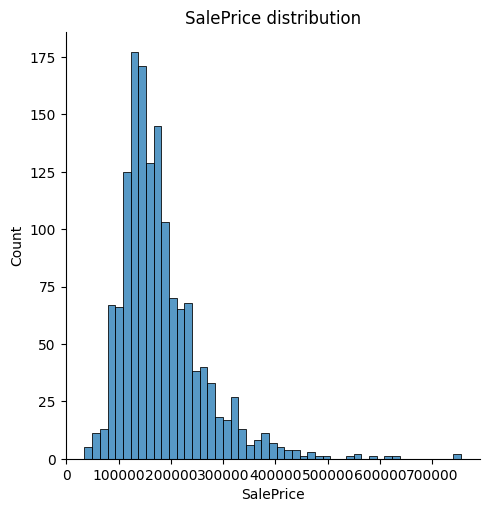

In [4]:
# View saleprice distributions
target = HomeDat.SalePrice
plt.figure()
sns.displot(target)
plt.title('SalePrice distribution')
plt.show();

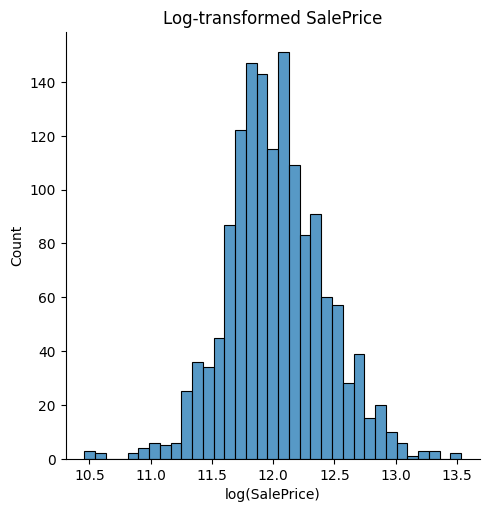

In [6]:
# log normalized saleprice
sns.displot(np.log(target))
plt.title('Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show();

In [7]:
print('SalePrice has a skew of ' + str(target.skew().round(decimals=2)) + 
      ' while the log-transformed SalePrice improves the skew to ' + 
      str(np.log(target).skew().round(decimals=2)))

SalePrice has a skew of 1.88 while the log-transformed SalePrice improves the skew to 0.12


Features/predictor variables should also be consided for skewed distributions.

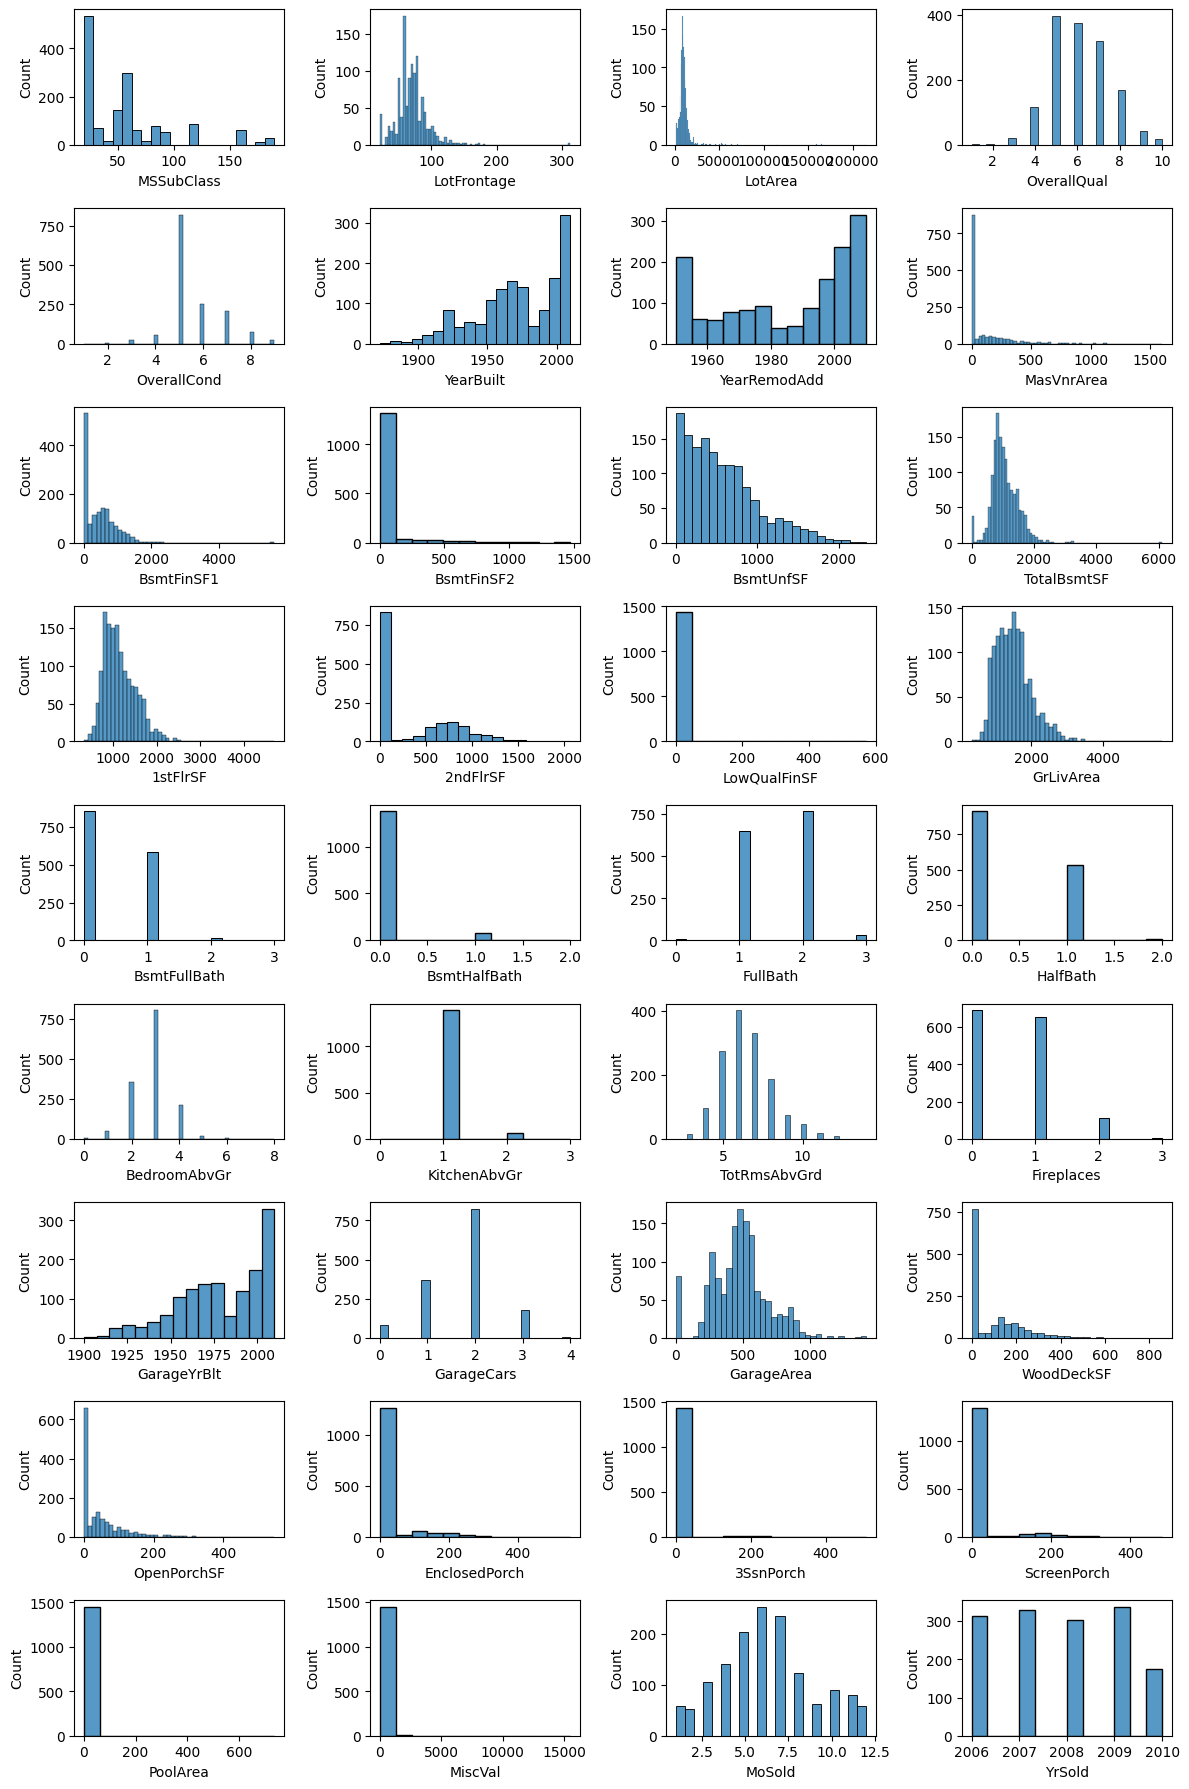

In [5]:
num_attributes = HomeDat.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.histplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show();

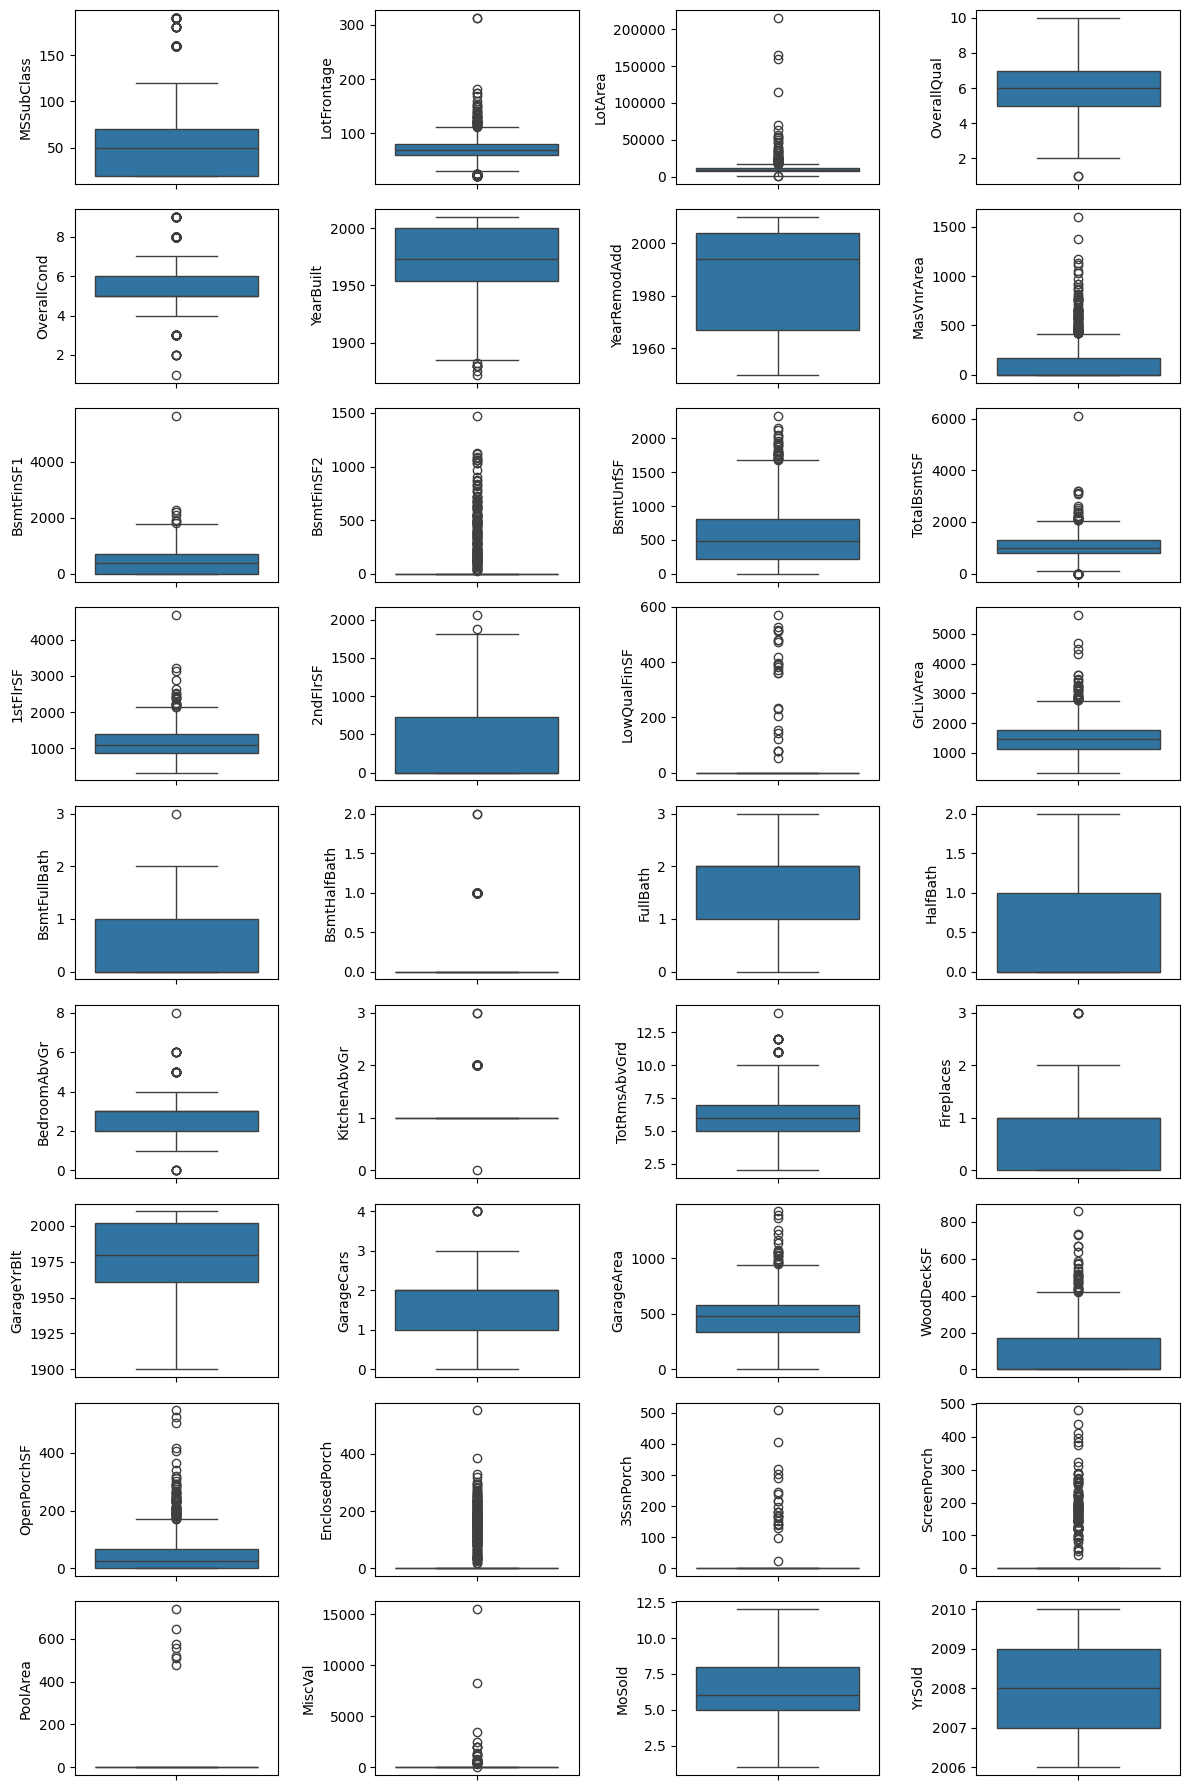

In [10]:
# Univatiate analysis: box plot for numberical features
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:, i])

plt.tight_layout()
plt.show();

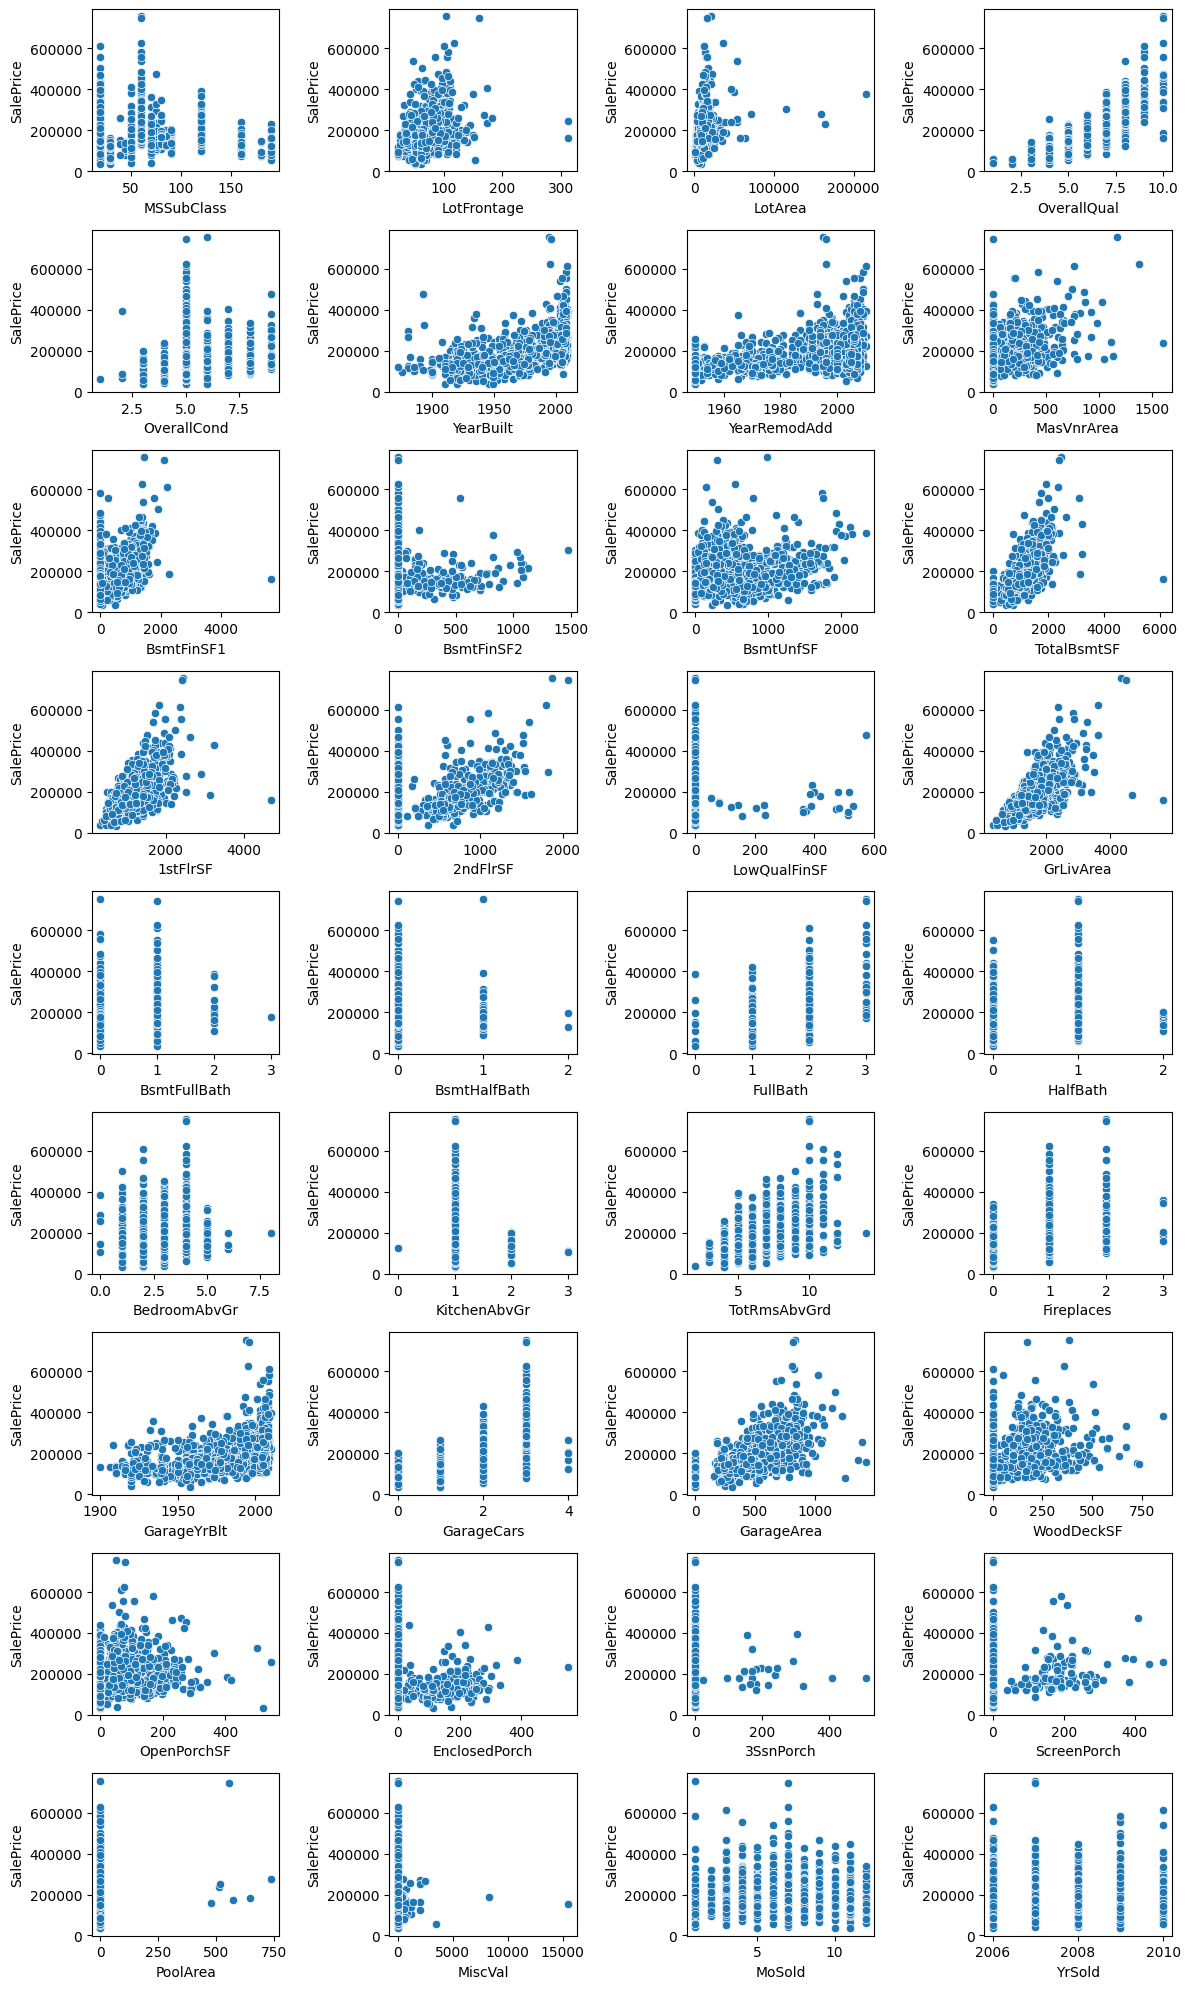

In [14]:
# Bivarate analysis: scatter plots of target versus numerical features
f = plt.figure(figsize=(12, 20))

for i in range(len(num_attributes.columns)):
    ax = f.add_subplot(9, 4, i + 1)  
    sns.scatterplot(x=num_attributes.iloc[:, i], y=target, ax=ax)  
    ax.set_xlabel(num_attributes.columns[i])
    ax.set_ylabel("SalePrice")

plt.tight_layout()
plt.show();

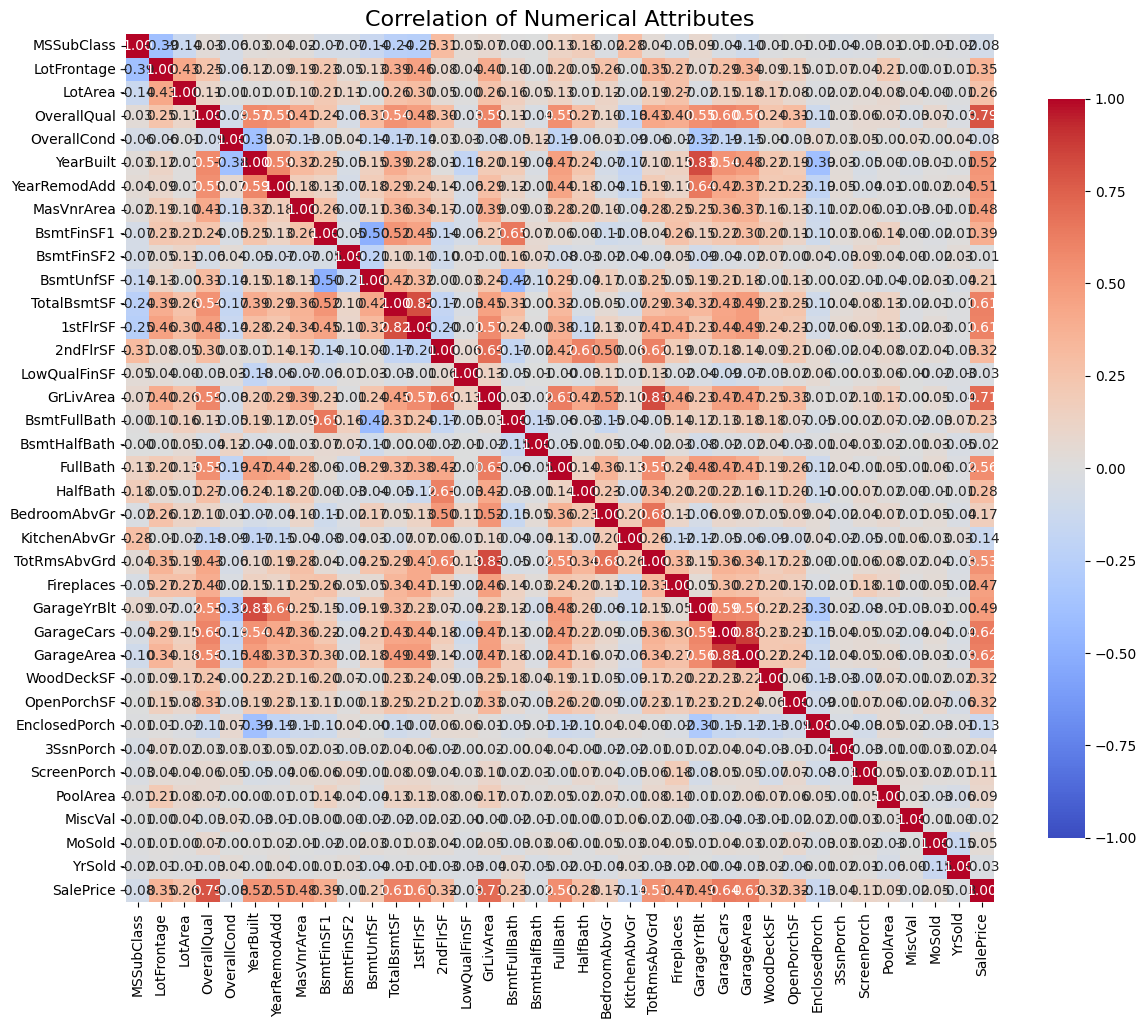

In [6]:
# Select only numeric columns from HomeDat
numeric_data = HomeDat.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation = numeric_data.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(14, 12))
plt.title('Correlation of Numerical Attributes', size=16)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.show();

Exclude or "engineer" highly correlated features


In [7]:
# Missing numerical values
num_attributes.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
WoodDeckSF        0
BedroomAbvGr      0
dtype: int64

Exclude or impute features with missing values

## Cateforical variables

In [8]:
cat_columns = HomeDat.select_dtypes(include='object').columns

print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


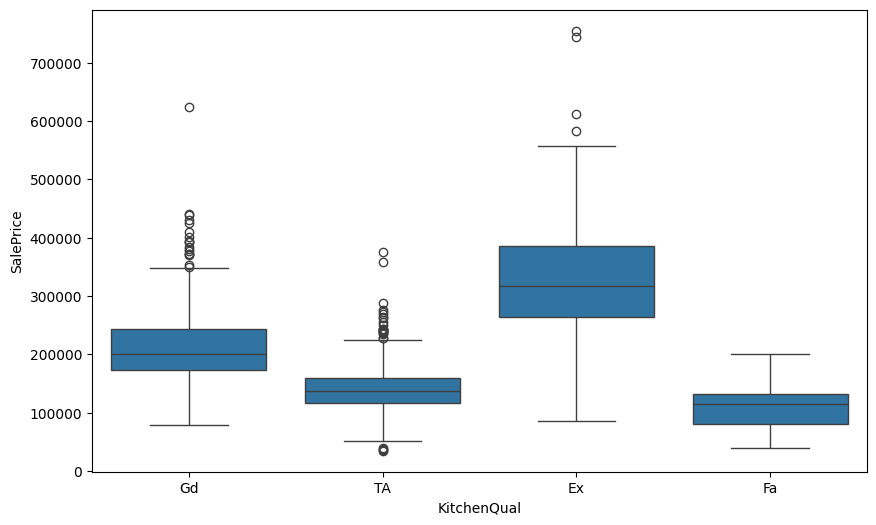

In [21]:
# Explore 
var = HomeDat['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=HomeDat.SalePrice, x=var)
plt.show();

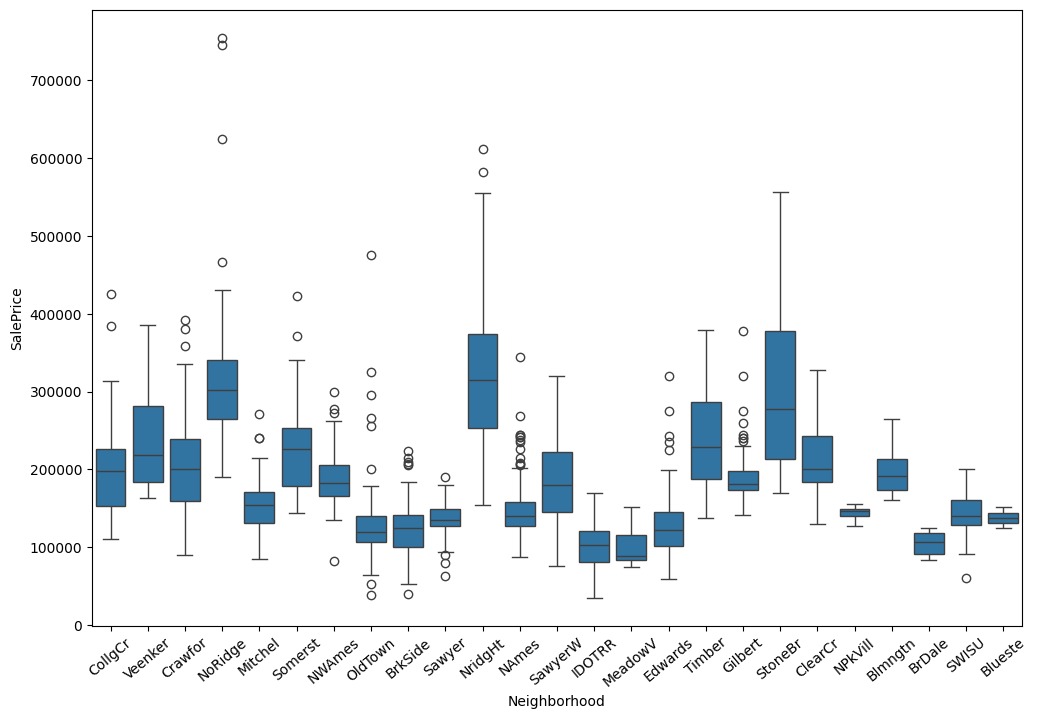

In [24]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=HomeDat.SalePrice, x=HomeDat.Neighborhood)
plt.xticks(rotation=40)
plt.show();

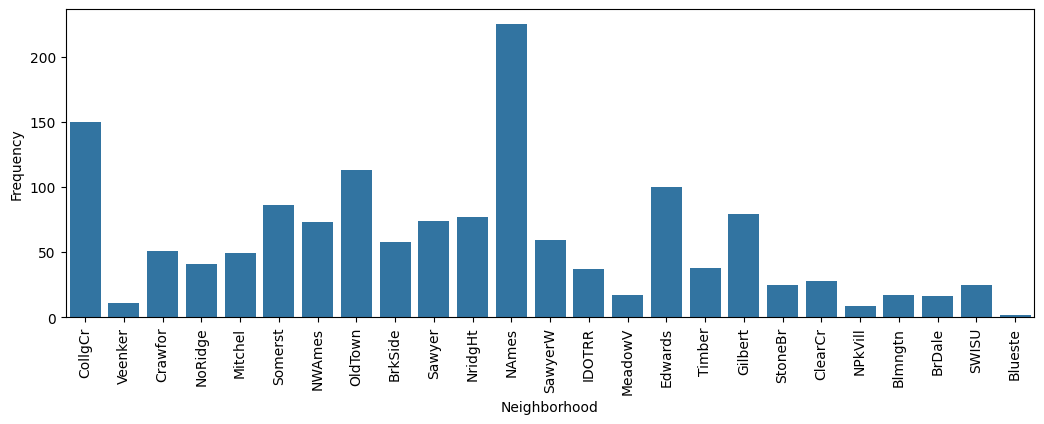

In [25]:
## Count of categories within Neighborhood attribute
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=HomeDat)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show();

In [26]:
# Missing categorical values
HomeDat[cat_columns].isna().sum().sort_values(ascending=False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
Electrical         1
KitchenQual        0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
# Deal with missing values
HomeDat_Copy = HomeDat.copy()

# 0 impote venear area
HomeDat_Copy.MasVnrArea = HomeDat_Copy.MasVnrArea.fillna(0)

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for cat in cat_cols_fill_none:
    HomeDat_Copy[cat] = HomeDat_Copy[cat].fillna("None")

# Check remaining NA values
HomeDat_Copy.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
Electrical        1
KitchenAbvGr      0
GarageFinish      0
dtype: int64

In [16]:
# Remove outliers based on observations on scatter plots against SalePrice:
HomeDat_Copy = HomeDat_Copy.drop(HomeDat_Copy['LotFrontage']
                                     [HomeDat_Copy['LotFrontage']>200].index)
HomeDat_Copy = HomeDat_Copy.drop(HomeDat_Copy['LotArea']
                                     [HomeDat_Copy['LotArea']>100000].index)
HomeDat_Copy = HomeDat_Copy.drop(HomeDat_Copy['BsmtFinSF1']
                                     [HomeDat_Copy['BsmtFinSF1']>4000].index)
HomeDat_Copy = HomeDat_Copy.drop(HomeDat_Copy['TotalBsmtSF']
                                     [HomeDat_Copy['TotalBsmtSF']>6000].index)
HomeDat_Copy = HomeDat_Copy.drop(HomeDat_Copy['1stFlrSF']
                                     [HomeDat_Copy['1stFlrSF']>4000].index)
HomeDat_Copy = HomeDat_Copy.drop(HomeDat_Copy.GrLivArea
                                     [(HomeDat_Copy['GrLivArea']>4000) & 
                                      (target<300000)].index)
HomeDat_Copy = HomeDat_Copy.drop(HomeDat_Copy.LowQualFinSF
                                     [HomeDat_Copy['LowQualFinSF']>550].index)


# Explore Data

explain

# Analyze Data

explain

# Conclusions

## Discoveries

explain

## Future Directions

explain

# End

## Show Session Information

In [ ]:
import session_info
session_info.show()

## Save Session Requirements

In [54]:
# Replace spaces in notebook title with underscores
filename = Notebook_title.replace(" ", "_") + "_requirements.txt"

# Run the pip freeze command and save the output txt file
!pip freeze > $filename